## Logistic Regression

this is a Classification model even though it has a regression in its name it is mainly used for classifaction with the help of sigmoid algorithm 
sigmoid = 1/1+e-z
z stands for distance * value 

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

### Train Data

In [2]:
#the datasets we got from the team has separate files for training and testing 
traindata1 = pd.read_csv('Titanic_train.csv')
traindata = traindata1.copy()
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
traindata.shape

(891, 12)

In [4]:
traindata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

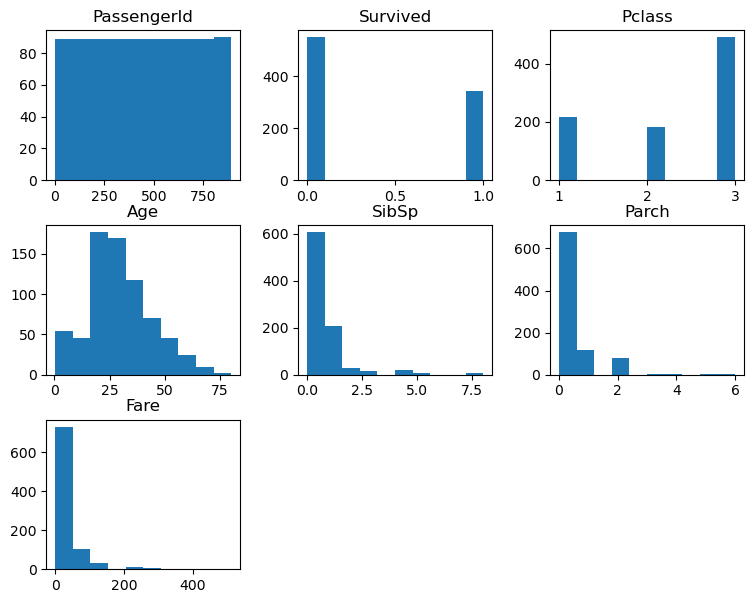

In [5]:
traindata.hist(bins=10,figsize=(9,7),grid=False)
plt.show()

Text(0.5, 1.0, 'how many men and women in traindata')

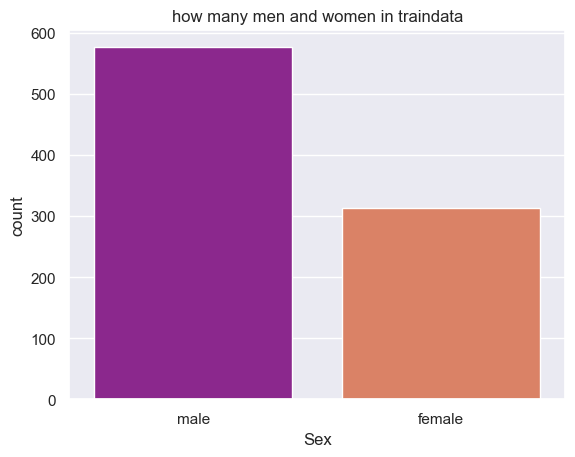

In [6]:
sns.set(font_scale=1)
sns.countplot(x='Sex',data=traindata,palette='plasma').set_title('how many men and women in traindata')

As the data is having few categorical columns and they are not related to our analysis (PassengerID,name,Ticket) we remove them and for other columns we gonna have dummies and check


### EDA for Train data

In [7]:
#dropping the columns PassengerId,Name,Ticket as they are categorical and doesnt correlate with the target column
traindata.drop(columns=['Name','Ticket'],inplace=True)

In [8]:
traindata

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [9]:
#getting dummies for categorical columns in the dataframe
dummiestrain= pd.get_dummies(traindata[['Sex','Embarked']],dtype=int)
dummiestrain

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [10]:
traindata.drop('Sex',axis=1,inplace=True)

In [11]:
traindata.drop('Embarked',axis=1,inplace=True)

In [12]:
traindata.drop('Cabin',axis=1,inplace=True)

In [13]:
traindata=dummiestrain.join(traindata,how='right')

In [14]:
traindata

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,2,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,3,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,4,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,887,0,2,27.0,0,0,13.0000
887,1,0,0,0,1,888,1,1,19.0,0,0,30.0000
888,1,0,0,0,1,889,0,3,NaN,1,2,23.4500
889,0,1,1,0,0,890,1,1,26.0,0,0,30.0000


In [15]:
traindata.isnull().sum()

Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [16]:
traindata['Age']=traindata['Age'].fillna(traindata['Age'].median())

In [17]:
traindata.isnull().sum()

Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [18]:
traindata[['Age','Fare']]=np.int64(traindata[['Age','Fare']])

In [19]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sex_female   891 non-null    int32
 1   Sex_male     891 non-null    int32
 2   Embarked_C   891 non-null    int32
 3   Embarked_Q   891 non-null    int32
 4   Embarked_S   891 non-null    int32
 5   PassengerId  891 non-null    int64
 6   Survived     891 non-null    int64
 7   Pclass       891 non-null    int64
 8   Age          891 non-null    int64
 9   SibSp        891 non-null    int64
 10  Parch        891 non-null    int64
 11  Fare         891 non-null    int64
dtypes: int32(5), int64(7)
memory usage: 66.3 KB


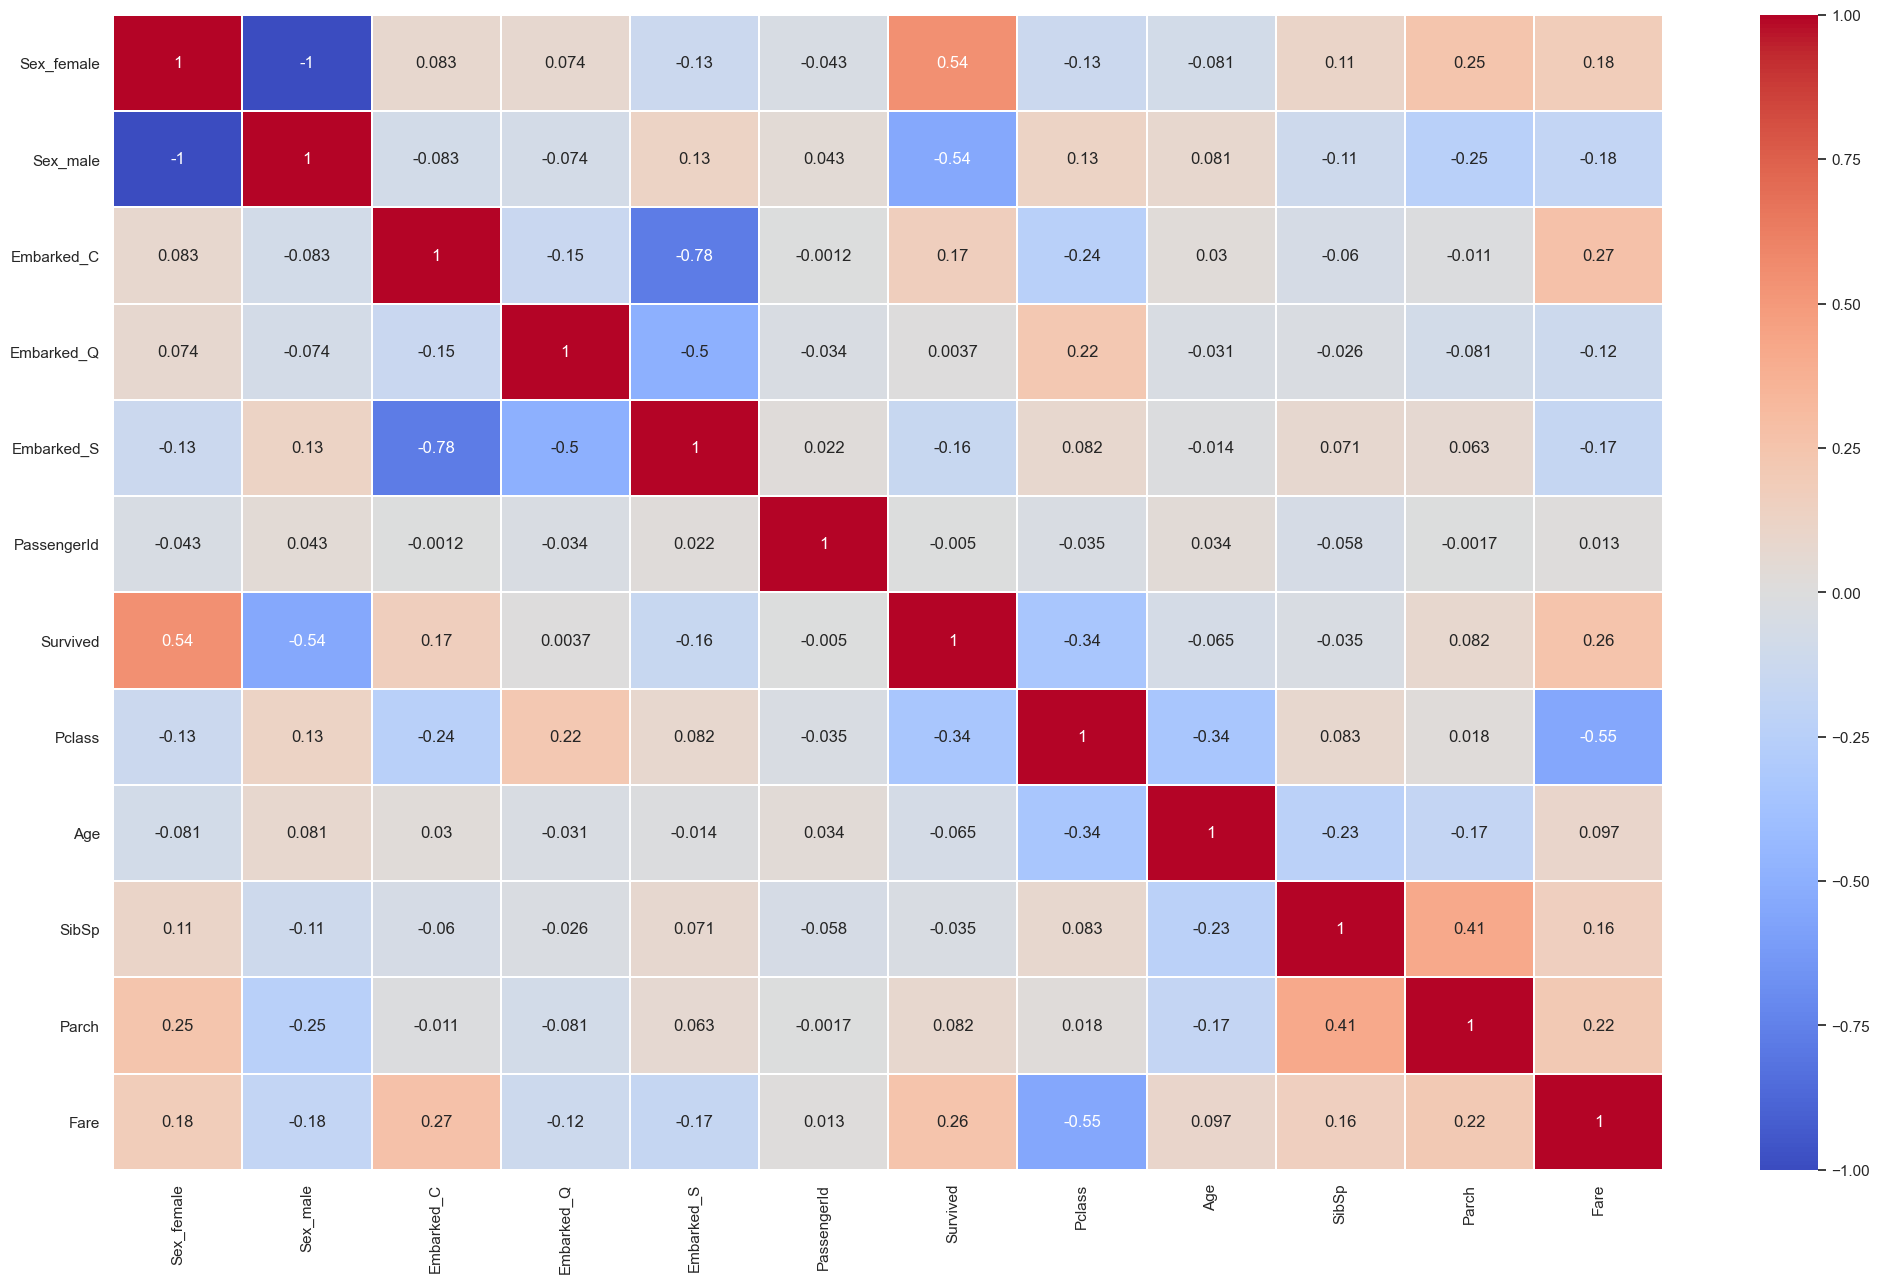

In [20]:
#correlation 
sns.heatmap(traindata.corr(),annot=True,cmap='coolwarm',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [21]:
#check for duplicate columns

In [22]:
traindata.duplicated().sum()

0

In [23]:
features_train = traindata.drop('Survived',axis=1)
features_train

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,1,3,22,1,0,7
1,1,0,1,0,0,2,1,38,1,0,71
2,1,0,0,0,1,3,3,26,0,0,7
3,1,0,0,0,1,4,1,35,1,0,53
4,0,1,0,0,1,5,3,35,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,887,2,27,0,0,13
887,1,0,0,0,1,888,1,19,0,0,30
888,1,0,0,0,1,889,3,28,1,2,23
889,0,1,1,0,0,890,1,26,0,0,30


In [24]:
target_train= traindata[['Survived']]
target_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Test Data

In [25]:
testdata = pd.read_csv('Titanic_test.csv')

In [26]:
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


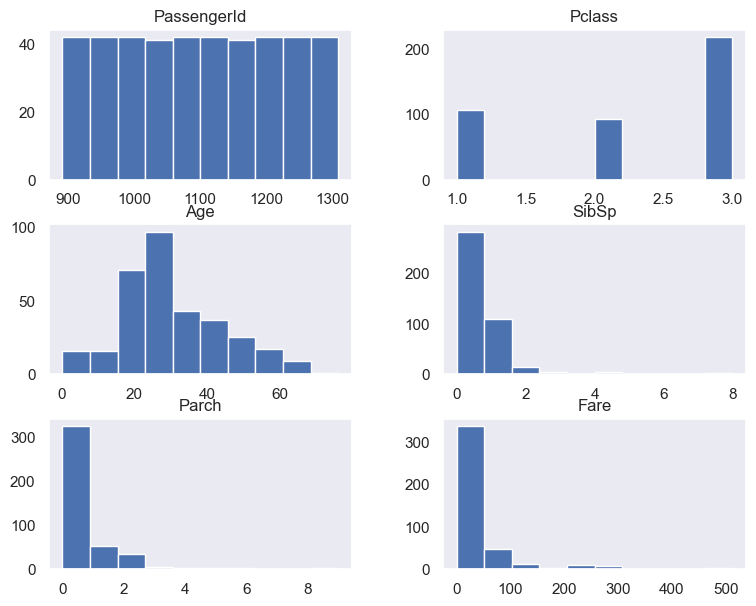

In [27]:
testdata.hist(bins=10,grid=False,figsize=(9,7))
plt.show()

### perform EDA for the test data

In [28]:
testdata.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [29]:
testdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [30]:
dummies = pd.get_dummies(testdata[['Sex','Embarked']],dtype=int)

In [31]:
testdata.drop('Sex',axis=1,inplace=True)

In [32]:
testdata.drop('Embarked',axis=1,inplace=True)

In [33]:
testdata=dummies.join(testdata,how='right')

In [34]:
testdata['Age'].dtype

dtype('float64')

In [35]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_female   418 non-null    int32  
 1   Sex_male     418 non-null    int32  
 2   Embarked_C   418 non-null    int32  
 3   Embarked_Q   418 non-null    int32  
 4   Embarked_S   418 non-null    int32  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Age          332 non-null    float64
 8   SibSp        418 non-null    int64  
 9   Parch        418 non-null    int64  
 10  Fare         417 non-null    float64
dtypes: float64(2), int32(5), int64(4)
memory usage: 27.9 KB


In [36]:
testdata[['Age','Fare']] = np.int64(testdata[['Age','Fare']])

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:1998: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [37]:
testdata.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,1,0,892,3,34,0,0,7
1,1,0,0,0,1,893,3,47,1,0,7
2,0,1,0,1,0,894,2,62,0,0,9
3,0,1,0,0,1,895,3,27,0,0,8
4,1,0,0,0,1,896,3,22,1,1,12


## Train The Model Logistic Regression

In [38]:
logreg = LogisticRegression()

In [39]:
x_train,x_test,y_train,y_test = train_test_split(features_train,target_train,train_size=0.8,random_state=10)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(179, 11)
(712, 1)
(179, 1)


In [41]:
logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
ypred= logreg.predict(x_test)
ypred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [43]:
print(logreg.score(x_test,y_test))
ypred = logreg.predict(x_test)
print("suvived",sum(ypred!=0))
print("Not Survived",sum(ypred==0))

0.8100558659217877
suvived 56
Not Survived 123


In [44]:
#confusion matrix

In [45]:
confusion_matrix(y_test,ypred)

array([[103,  14],
       [ 20,  42]], dtype=int64)

<AxesSubplot:>

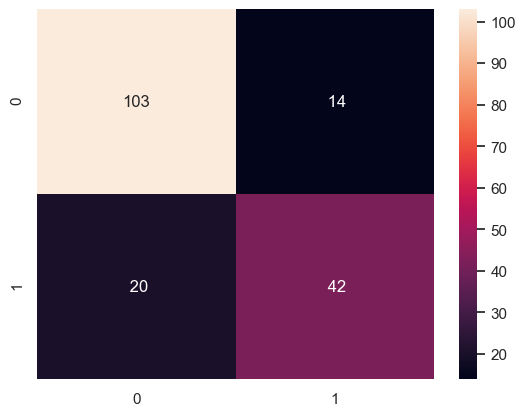

In [46]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='3.0f')

### Accuracy

In [47]:
score=round(accuracy_score(ypred,y_test)*100,2)
print(f"The accuracy for the model is {score}")

The accuracy for the model is 81.01


## Classification Report

In [48]:
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86       117\n           1       0.75      0.68      0.71        62\n\n    accuracy                           0.81       179\n   macro avg       0.79      0.78      0.79       179\nweighted avg       0.81      0.81      0.81       179\n'

In [55]:
roc_auc = roc_auc_score(y_test,ypred)
print(roc_auc)

0.7788806175902949


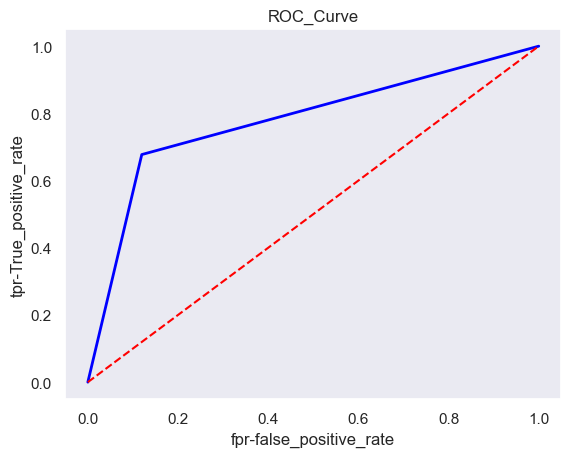

In [61]:
fpr,tpr,thr = roc_curve(y_test,ypred)
plt.plot(fpr,tpr,lw=2,color='blue',label=f'AUC:{roc_auc:.2}')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr-false_positive_rate')
plt.ylabel('tpr-True_positive_rate')
plt.title('ROC_Curve')
plt.grid(False)